Hammerstein, Erica: 95/100

# Introduction
For this lab, we examined some statistics things about probability, trials, successes and the like. We learned about the Binomial theorem, which gives you the probability of success for a certain number of trials and a certain number of successes for a given probability of success. The most classic example of this is the coin flip example. We also looked at what happens when you have an "unfair coin". In the coin flip example, this would mean that the probability of getting heads/tails is more/less compared to the probability of getting the other. In the homework, we were able to derive the Poisson, as the "unfair coin is called", probability distribution function from the Binomial probability distribution function because p was much smaller than 1. When we did some fancy natural logarithmic mathemagic, it came out that the Binomial PDF was the same as the Poisson PDF for very small p! We then used the following programming magic to play around with this in a computer. We used programming because who really wants to flip 20 coins 1000000 times?? No one.

# Theory
Before we get to the good programmy stuff, let's look at some equation things.

The Binomial PDF is: $P(N,n) = {N! \over n!(N-n!)}  p^n (1-p)^{(N-n)}$

The Poisson Distribution is: $P(N,n) = {\lambda^n e^{-\lambda}\over n!}$ where ${\lambda}$ is Np

# Problem 1
In problem one, the basis of it is just to do a Binomial PDF experiment using a computer and then compare it to what the Binomial PDF says it should be. The following program basically flips a certain number of coins a certain number of times and tells you what the random outputs are. It then plots the Binomial PDF for the same conditions as the experiment and plots it on a histogram for easy viewing. We also calculated the expectation value, which is the expected value for the outcome of experiment.

Enter number of trials: 1000000
Enter number of coins per trial: 20
E(x) = 10.001874


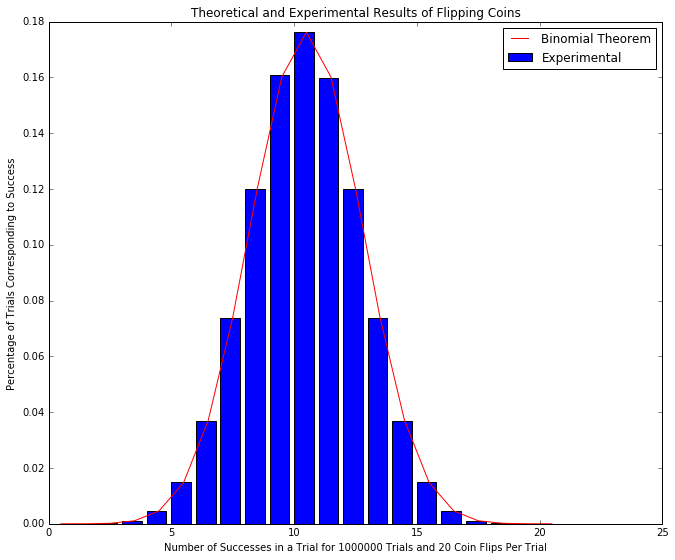

In [118]:
%matplotlib inline
from __future__ import division
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as scm
figsize(11, 9)

trial = int(raw_input('Enter number of trials: '))
coin = int(raw_input('Enter number of coins per trial: '))

counts = np.zeros(coin+1)
for i in range(0,trial):
    draw = np.random.randint(2, size=coin)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = ((counts[heads_count] +1))
def PNx(coin):
    p = 0.5
    x = (np.arange(coin+1.))
    PNx = scm.factorial(coin)/((scm.factorial(x)*scm.factorial(coin-x)))*((0.5)**coin)
    return PNx

P_x = counts/trial
x_vec = np.arange(coin+1)
E_x = np.sum(P_x*x_vec)
print 'E(x) = ' + str(E_x)


plt.bar(np.arange(coin+1), counts/trial, label = 'Experimental')
plt.plot(np.arange(coin+1)+0.5,PNx(coin), color = 'r', label = 'Binomial Theorem')
plt.legend(fontsize=12)
plt.title('Theoretical and Experimental Results of Flipping Coins')
plt.ylabel('Percentage of Trials Corresponding to Success')
plt.xlabel('Number of Successes in a Trial for ' + str(trial) + ' Trials and '
          + str(coin) + ' Coin Flips Per Trial')
plt.show()

# Problem 2
Problem 2 was where we factored in the unfairness of a coin. The difference between how I defined a success in this problem and the previous one is that a success is defined as a value drawn that is less than the user inputted probability. This allowed me to choose the "cut off point" for a success. The rest of the problem is relatively the same, except that we plotted the Poisson PDF using that formula as well as the Binomial PDF for the user inputted numbers. Another thing that is different is the variance, how far the data is spread out from the mean, which you can see defined in my code as
### Variance = ${<x^2> - <x>^2}$ 
We also calculated the chi-squared statistic which tells you how close the experimental data is to the expected data. 

Enter number of trials: 10000
Enter number of coins per trial: 100
Enter the probability of success: .01
The variance is 0.96606519
The mean is 0.9941
The Chi-Squared value is 7.10174433825e-05


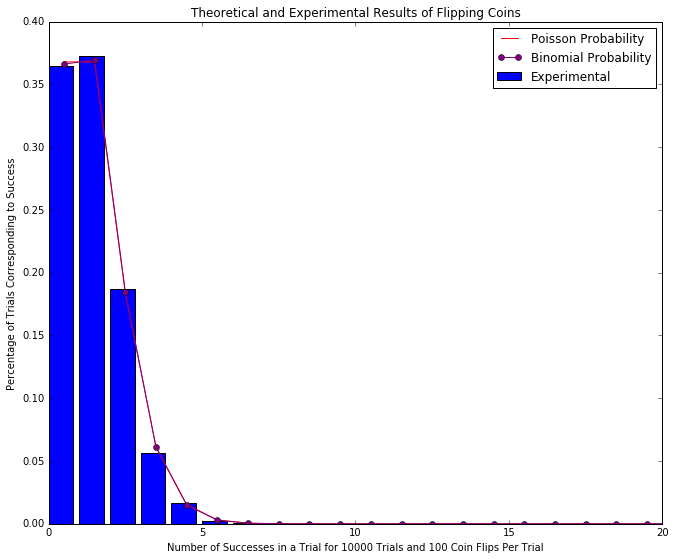

In [115]:
%matplotlib inline
from __future__ import division
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import scipy.misc as scm
figsize(11, 9)

trial = int(raw_input('Enter number of trials: '))
coin = int(raw_input('Enter number of coins per trial: '))
prob = float(raw_input('Enter the probability of success: '))

counts = np.zeros(coin+1)
for i in range(0,trial):
    draw = np.random.uniform(0,1, size=coin)
    heads_count = len(draw[(np.where(draw < prob))])
    tails_count = len(draw[(np.where(draw > prob))])
    counts[heads_count] = ((counts[heads_count] +1))
def PNx(coin):
    p = prob
    x = (np.arange(coin+1.))
    l = coin*p
    PNx = (l**(x))*np.exp(-l)/(scm.factorial(x))
    return PNx
def PNx1(coin):
    p = prob
    x = (np.arange(coin+1.))
    PNx1 = (scm.factorial(coin)/((scm.factorial(x)*scm.factorial(coin-x))))*((p)**x)*((1-p)**(coin-x))
    return PNx1

P_x = counts/trial
x_vec = np.arange(coin+1)
E_x = np.sum(P_x*x_vec)
E_xsq = np.sum((P_x*(x_vec**2)))

variance = E_xsq - E_x**2
print 'The variance is ' + str(variance)
print 'The mean is ' + str(E_x)

chi = (np.sum(((counts/trial)-PNx(coin))**2))

print 'The Chi-Squared value is ' + str(chi)


plt.bar(np.arange(coin+1.), counts/trial, label = 'Experimental')
plt.plot(np.arange(coin+1)+0.5,PNx(coin), color = 'r', label = 'Poisson Probability')
plt.plot(np.arange(coin+1)+0.5,PNx1(coin), color = 'purple', 
         label = 'Binomial Probability',marker = 'o')
plt.legend(fontsize=12)
plt.title('Theoretical and Experimental Results of Flipping Coins')
plt.ylabel('Percentage of Trials Corresponding to Success')
plt.xlabel('Number of Successes in a Trial for ' + str(trial) + ' Trials and '
          + str(coin) + ' Coin Flips Per Trial')
plt.xlim(0,20)
plt.show()

# Conclusion
This lab helped me to visualize how data and statistics of experiments change depending on the numbers that you use, i.e. the more trials the better the data, etc. But why do I care? Well, the math was kind of annyoying, but when talking about astronomical observations, it is very unlikely that we are gonna get a lot of data from a specific observation. Poisson would apply to these types of situations. It was kind of cool to be able to manipulate the input numbers and see what happened to the data. I saw that the more trials that we ran, the longer our code took to execute, but the more accurate our data was. This would reduce the chi-squared value and mean that our data/experiment isn't total junk. I would probably want my future self to know that sometimes it is better to hardcode things so that you can see what you are doing and be in control of the variables, especially when you aren't too familiar with that the function does or what you are trying to do.

# 5/7 PERFECT SCORE